In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/muffin-vs-chihuahua-image-classification/test/muffin/img_3_835.jpg
/kaggle/input/muffin-vs-chihuahua-image-classification/test/muffin/img_2_138.jpg
/kaggle/input/muffin-vs-chihuahua-image-classification/test/muffin/img_3_570.jpg
/kaggle/input/muffin-vs-chihuahua-image-classification/test/muffin/img_1_210.jpg
/kaggle/input/muffin-vs-chihuahua-image-classification/test/muffin/img_1_581.jpg
/kaggle/input/muffin-vs-chihuahua-image-classification/test/muffin/img_1_920.jpg
/kaggle/input/muffin-vs-chihuahua-image-classification/test/muffin/img_1_547.jpg
/kaggle/input/muffin-vs-chihuahua-image-classification/test/muffin/img_2_819.jpg
/kaggle/input/muffin-vs-chihuahua-image-classification/test/muffin/img_2_821.jpg
/kaggle/input/muffin-vs-chihuahua-image-classification/test/muffin/img_0_591.jpg
/kaggle/input/muffin-vs-chihuahua-image-classification/test/muffin/img_4_1.jpg
/kaggle/input/muffin-vs-chihuahua-image-classification/test/muffin/img_3_239.jpg
/kaggle/input/muffin-vs-chihua

#Define paths and train+val split

In [ ]:
# Define paths
TRAIN_DIR = "/kaggle/input/muffin-vs-chihuahua-image-classification/train"
TEST_DIR  = "/kaggle/input/muffin-vs-chihuahua-image-classification/test"

print("Train folder:", TRAIN_DIR)
print("Test folder:", TEST_DIR)


from sklearn.model_selection import train_test_split
from imutils import paths

# Get image paths and labels from TRAIN_DIR
train_imagePaths = list(paths.list_images(TRAIN_DIR))
print("Total train images:", len(train_imagePaths))


test_imagePaths = list(paths.list_images(TEST_DIR))
print("Test set size:", len(test_imagePaths))


Train folder: /kaggle/input/muffin-vs-chihuahua-image-classification/train
Test folder: /kaggle/input/muffin-vs-chihuahua-image-classification/test
Total train images: 4733
Test set size: 1184


In [ ]:
# =======================================
# STEP 1: Use TRAIN_DIR for train+val split
# =======================================
from sklearn.model_selection import train_test_split
from imutils import paths

# Get image paths and labels from TRAIN_DIR
train_imagePaths = list(paths.list_images(TRAIN_DIR))
print("Total train images:", len(train_imagePaths))


test_imagePaths = list(paths.list_images(TEST_DIR))
print("Test set size:", len(test_imagePaths))


Total train images: 4733
Test set size: 1184


Step 1: Dataset Preparation

In [ ]:

import os
import pandas as pd
from sklearn.model_selection import train_test_split


image_paths = []
labels = []

# Loop through train directory
for class_name in os.listdir(TRAIN_DIR):
    class_folder = os.path.join(TRAIN_DIR, class_name)
    if os.path.isdir(class_folder):
        for filename in os.listdir(class_folder):
            if filename.endswith((".jpg", ".png")):
                image_paths.append(os.path.join(class_folder, filename))
                labels.append(class_name)

# Create DataFrame
df = pd.DataFrame({'filename': image_paths, 'label': labels})

# Split into train and validation sets
df_train, df_val = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])


test_image_paths = []
test_labels = []

# Loop through test directory
for class_name in os.listdir(TEST_DIR):
    class_folder = os.path.join(TEST_DIR, class_name)
    if os.path.isdir(class_folder):
        for filename in os.listdir(class_folder):
            if filename.endswith((".jpg", ".png")):
                test_image_paths.append(os.path.join(class_folder, filename))
                test_labels.append(class_name)

# Create test DataFrame
df_test = pd.DataFrame({'filename': test_image_paths, 'label': test_labels})

print("Train size:", len(df_train))
print("Validation size:", len(df_val))
print("Test size:", len(df_test))

print("Class distribution in train set:\n", df_train['label'].value_counts())
print("Class distribution in test set:\n", df_test['label'].value_counts())


Train size: 3786
Validation size: 947
Test size: 1184
Class distribution in train set:
 label
chihuahua    2047
muffin       1739
Name: count, dtype: int64
Class distribution in test set:
 label
chihuahua    640
muffin       544
Name: count, dtype: int64


Data Generators

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (128, 128)  # You can increase to 224x224
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    df_train,
    x_col='filename',
    y_col='label',
    target_size=IMG_SIZE,
    class_mode='binary',
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_generator = val_datagen.flow_from_dataframe(
    df_val,
    x_col='filename',
    y_col='label',
    target_size=IMG_SIZE,
    class_mode='binary',
    batch_size=BATCH_SIZE,
    shuffle=False
)

test_generator = test_datagen.flow_from_dataframe(
    df_test,
    x_col='filename',
    y_col='label',
    target_size=IMG_SIZE,
    class_mode='binary',
    batch_size=BATCH_SIZE,
    shuffle=False
)

# ======================================



2025-09-06 12:48:37.073622: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757162917.262002      76 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757162917.315778      76 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 3786 validated image filenames belonging to 2 classes.
Found 947 validated image filenames belonging to 2 classes.
Found 1184 validated image filenames belonging to 2 classes.


# Step 3: CNN Model

Epoch 1/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 27s 193ms/step - accuracy: 0.6420 - loss: 0.6902 - val_accuracy: 0.7339 - val_loss: 0.5280
Epoch 2/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 21s 174ms/step - accuracy: 0.7870 - loss: 0.4515 - val_accuracy: 0.8427 - val_loss: 0.3763
Epoch 3/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 22s 184ms/step - accuracy: 0.8534 - loss: 0.3550 - val_accuracy: 0.8648 - val_loss: 0.3166
Epoch 4/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 21s 176ms/step - accuracy: 0.8540 - loss: 0.3471 - val_accuracy: 0.8490 - val_loss: 0.3510
Epoch 5/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 21s 175ms/step - accuracy: 0.8942 - loss: 0.2659 - val_accuracy: 0.8543 - val_loss: 0.3261
Epoch 6/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 21s 178ms/step - accuracy: 0.8963 - loss: 0.2615 - val_accuracy: 0.8712 - val_loss: 0.2807
Epoch 7/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 21s 175ms/step - accuracy: 0.9078 - loss: 0.2217 - val_accuracy: 0.8669 - val_loss: 0.3140
Epoch 8/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 21s 174ms/step - accuracy: 0.9343 - loss: 0

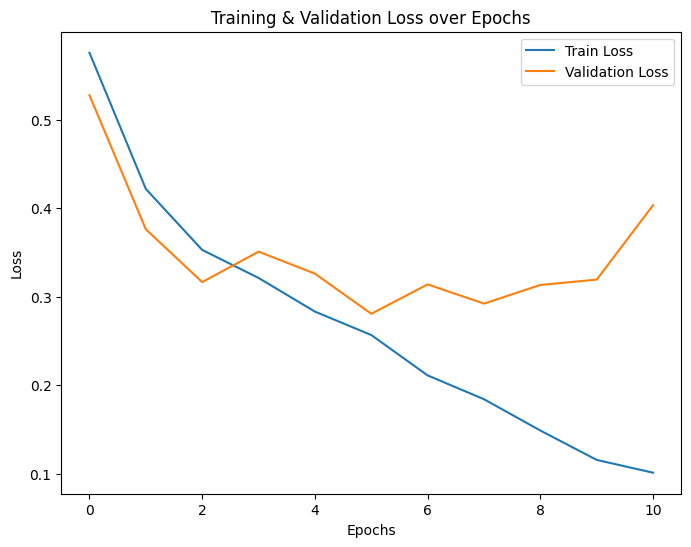

37/37 ━━━━━━━━━━━━━━━━━━━━ 13s 338ms/step
Classification Report:
              precision    recall  f1-score   support

   chihuahua       0.91      0.91      0.91       640
      muffin       0.89      0.90      0.90       544

    accuracy                           0.90      1184
   macro avg       0.90      0.90      0.90      1184
weighted avg       0.90      0.90      0.90      1184

Classification Report:
              precision    recall  f1-score   support

   chihuahua       0.91      0.91      0.91       640
      muffin       0.89      0.90      0.90       544

    accuracy                           0.90      1184
   macro avg       0.90      0.90      0.90      1184
weighted avg       0.90      0.90      0.90      1184

37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 147ms/step


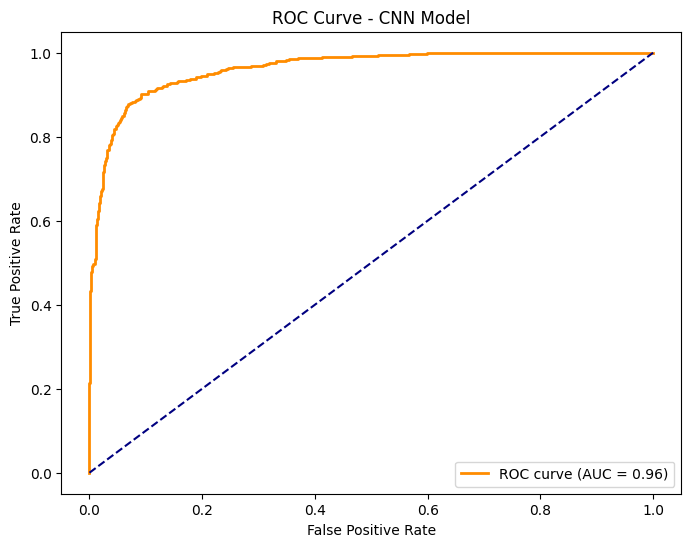

In [ ]:

import tensorflow as tf
from tensorflow.keras import layers, models

def build_simple_cnn(input_shape=(128,128,3)):
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')  # binary classification
    ])
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

cnn_model = build_simple_cnn(input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

# ======================================
# Step 4: Training
# ======================================
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = cnn_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=[early_stop],
    verbose=1
)

# ======================================
# Step 5: Plot Loss Curve
# ======================================
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss over Epochs")
plt.legend()
plt.show()


from sklearn.metrics import classification_report

# Convert predicted probabilities to binary labels
# Get predicted probabilities on test set
test_probs = cnn_model.predict(test_generator, steps=len(test_generator), verbose=1)

# True labels
y_true = test_generator.classes

# Convert probabilities to binary predictions
y_pred = (test_probs >= 0.5).astype(int)

# Classification report
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=list(test_generator.class_indices.keys())))

y_pred = (test_probs >= 0.5).astype(int)

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))


# ======================================
# Step 6: ROC Curve on Test Set
# ======================================
from sklearn.metrics import roc_curve, auc

# Predictions
test_probs = cnn_model.predict(test_generator, steps=len(test_generator), verbose=1)
y_true = test_generator.classes

# ROC curve
fpr, tpr, thresholds = roc_curve(y_true, test_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - CNN Model")
plt.legend(loc="lower right")
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Filter only muffin images
df_muffin = df_train[df_train['label'] == 'muffin'].reset_index(drop=True)

# Create directory
aug_flip_dir = 'content/aug_horizontal_flip/muffin'
os.makedirs(aug_flip_dir, exist_ok=True)

# Define generator
flip_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True
)

flip_generator = flip_datagen.flow_from_dataframe(
    dataframe=df_muffin,
    x_col='filename',
    y_col='label',
    target_size=(128,128),
    class_mode=None,
    batch_size=1,        # generate one image at a time
    shuffle=False,
    save_to_dir=aug_flip_dir,
    save_prefix='flip',
    save_format='jpg'
)

# Generate only 100 augmented images
for i in range(100):
    next(flip_generator)


Found 1739 validated image filenames.


Image Augmentation

In [ ]:
# Create directory
aug_brightness_dir = 'content/aug_brightness/muffin'
os.makedirs(aug_brightness_dir, exist_ok=True)

# Define generator
brightness_datagen = ImageDataGenerator(
    rescale=1./255,
    brightness_range=[0.6, 1.4]
)

brightness_generator = brightness_datagen.flow_from_dataframe(
    dataframe=df_muffin.sample(n=100, random_state=42).reset_index(drop=True),
    x_col='filename',
    y_col='label',
    target_size=(128,128),
    class_mode=None,
    batch_size=1,
    shuffle=False,
    save_to_dir=aug_brightness_dir,
    save_prefix='bright',
    save_format='jpg'
)

# Generate augmented images
for i in range(100):
    next(brightness_generator)


Found 100 validated image filenames.


In [ ]:
# Create directory
aug_contrast_dir = 'content/aug_contrast/muffin'
os.makedirs(aug_contrast_dir, exist_ok=True)

# Define generator
contrast_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=[0.8, 1.2],
    horizontal_flip=True
)

contrast_generator = contrast_datagen.flow_from_dataframe(
    dataframe=df_muffin.sample(n=100, random_state=42).reset_index(drop=True),
    x_col='filename',
    y_col='label',
    target_size=(128,128),
    class_mode=None,
    batch_size=1,
    shuffle=False,
    save_to_dir=aug_contrast_dir,
    save_prefix='contrast',
    save_format='jpg'
)

# Generate augmented images
for i in range(100):
    next(contrast_generator)


Found 100 validated image filenames.


In [ ]:
import os
import pandas as pd



aug_dirs = ['content/aug_horizontal_flip', 'content/aug_brightness', 'content/aug_contrast']
aug_image_paths = []
aug_labels = []

for aug_dir in aug_dirs:
    muffin_folder = os.path.join(aug_dir, 'muffin')  # Only take 'muffin' images
    if os.path.exists(muffin_folder):
        for filename in os.listdir(muffin_folder):
            if filename.endswith((".jpg", ".png")):
                aug_image_paths.append(os.path.join(muffin_folder, filename))
                aug_labels.append('muffin')

# Create DataFrame for augmented images
df_aug = pd.DataFrame({'filename': aug_image_paths, 'label': aug_labels})



df_train_augmented = pd.concat([df_train, df_aug], ignore_index=True)

# Shuffle the combined DataFrame
df_train_augmented = df_train_augmented.sample(frac=1, random_state=42).reset_index(drop=True)

# Check new distribution
print("Original train size:", len(df_train))
print("After augmentation train size:", len(df_train_augmented))
print("Class distribution:\n", df_train_augmented['label'].value_counts())


Original train size: 3786
After augmentation train size: 4086
Class distribution:
 label
chihuahua    2047
muffin       2039
Name: count, dtype: int64


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ===============================
# Training augmentation
# ===============================
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    brightness_range=[0.6,1.4],
    zoom_range=[0.8,1.2]
)

# Validation generator (only rescale)
val_datagen = ImageDataGenerator(rescale=1./255)

# Test generator (only rescale)
test_datagen = ImageDataGenerator(rescale=1./255)

# ===============================
# Flow from DataFrame
# ===============================

train_generator_balanced = train_datagen.flow_from_dataframe(
    dataframe=df_train_augmented,
    x_col='filename',
    y_col='label',
    target_size=(128,128),
    class_mode='binary',
    batch_size=32,
    shuffle=True
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=df_val,
    x_col='filename',
    y_col='label',
    target_size=(128,128),
    class_mode='binary',
    batch_size=32,
    shuffle=False
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test,
    x_col='filename',
    y_col='label',
    target_size=(128,128),
    class_mode='binary',
    batch_size=32,
    shuffle=False
)


Found 4086 validated image filenames belonging to 2 classes.
Found 947 validated image filenames belonging to 2 classes.
Found 1184 validated image filenames belonging to 2 classes.


CNN architecture

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# ==============================
# Step 1: Define CNN Architectures
# ==============================
def build_cnn_A(input_shape=(128,128,3),
                conv1_filters=16, conv2_filters=32,
                dense_units=32, dropout_rate=0.1):
    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.Conv2D(conv1_filters, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(conv2_filters, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(dense_units, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

def build_cnn_B(input_shape=(128,128,3),
                conv1_filters=32, conv2_filters=64,
                dense_units=64, dropout_rate=0.2):
    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.Conv2D(conv1_filters, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(conv2_filters, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(dense_units, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

def build_cnn_C(input_shape=(128,128,3),
                conv1_filters=32, conv2_filters=64, conv3_filters=128,
                dense_units=128, dropout_rate=0.3):
    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.Conv2D(conv1_filters, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(conv2_filters, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(conv3_filters, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(dense_units, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

def build_cnn_D(input_shape=(128,128,3),
                conv1_filters=32, conv2_filters=64, conv3_filters=128, conv4_filters=256,
                dense_units=256, dropout_rate=0.4):
    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.Conv2D(conv1_filters, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(conv2_filters, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(conv3_filters, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(conv4_filters, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(dense_units, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(1, activation='sigmoid')
    ])
    return model


In [ ]:
def train_cnn_model(model, train_gen, val_gen, epochs=20):
    early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=epochs,
        callbacks=[early_stop]
    )
    return history

# ==============================
# Step 3: Build & Train Models
# ==============================
cnn_models = {
    "CNN-A": build_cnn_A(),
    "CNN-B": build_cnn_B(),
    "CNN-C": build_cnn_C(),
    "CNN-D": build_cnn_D()
}

histories = {}
for name, model in cnn_models.items():
    print(f"\nTraining {name} ...")
    histories[name] = train_cnn_model(model, train_generator_balanced, val_generator)
# Compare validation accuracies of all models
val_accuracies = {name: max(history.history['val_accuracy']) for name, history in histories.items()}
best_model_name = max(val_accuracies, key=val_accuracies.get)
best_model = cnn_models[best_model_name]

print(f"Best model based on validation accuracy: {best_model_name}")



Training CNN-A ...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 41s 294ms/step - accuracy: 0.5594 - loss: 0.7324 - val_accuracy: 0.7075 - val_loss: 0.5532
Epoch 2/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 35s 275ms/step - accuracy: 0.7943 - loss: 0.4565 - val_accuracy: 0.8448 - val_loss: 0.3497
Epoch 3/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 36s 280ms/step - accuracy: 0.8278 - loss: 0.3848 - val_accuracy: 0.8585 - val_loss: 0.3198
Epoch 4/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 35s 276ms/step - accuracy: 0.8525 - loss: 0.3566 - val_accuracy: 0.8522 - val_loss: 0.3312
Epoch 5/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 36s 280ms/step - accuracy: 0.8539 - loss: 0.3255 - val_accuracy: 0.7867 - val_loss: 0.4802
Epoch 6/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 35s 274ms/step - accuracy: 0.8711 - loss: 0.3085 - val_accuracy: 0.8405 - val_loss: 0.3802

Training CNN-B ...
Epoch 1/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 41s 295ms/step - accuracy: 0.6062 - loss: 0.8256 - val_accuracy: 0.8046 - val_loss: 0.4324
Epoch 2/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 36s 279ms/step - accura

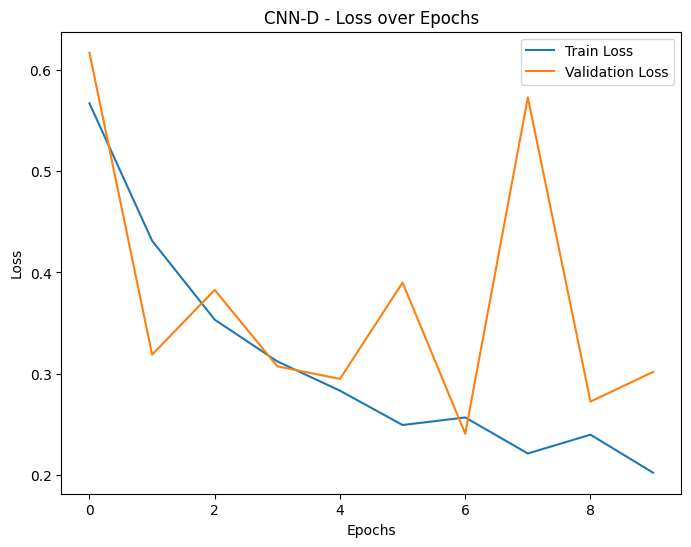

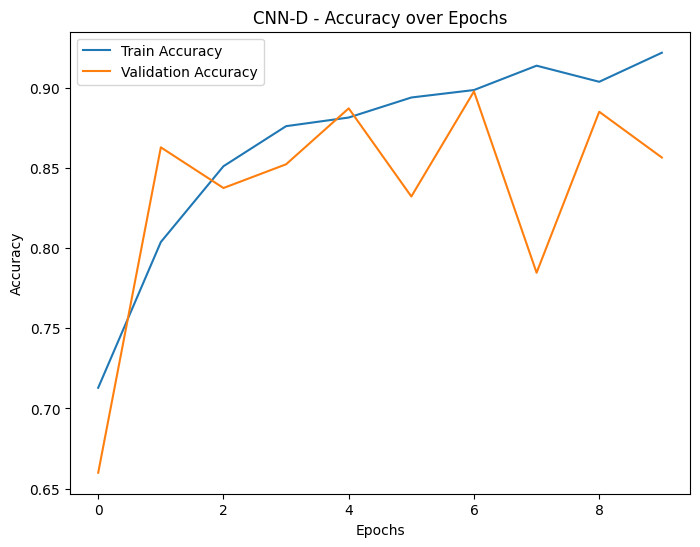

Best model based on validation accuracy: CNN-D


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,244,677 (31.45 MB)

 Trainable params: 2,748,225 (10.48 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,496,452 (20.97 MB)

In [ ]:
# ======================================
# Step 4: Plot Curves for Best Model
# ======================================
import matplotlib.pyplot as plt

def plot_best_model_curves(history, model_name):
    # Plot Loss
    plt.figure(figsize=(8,6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f"{model_name} - Loss over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    # Plot Accuracy
    plt.figure(figsize=(8,6))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f"{model_name} - Accuracy over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

# Call function for best model
plot_best_model_curves(histories[best_model_name], best_model_name)

# ======================================
# Step 5: Best Model Summary
# ======================================
print(f"Best model based on validation accuracy: {best_model_name}")
best_model.summary()


30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step
Classification Report for CNN-D:
              precision    recall  f1-score   support

   chihuahua       0.93      0.88      0.90       512
      muffin       0.87      0.92      0.89       435

    accuracy                           0.90       947
   macro avg       0.90      0.90      0.90       947
weighted avg       0.90      0.90      0.90       947



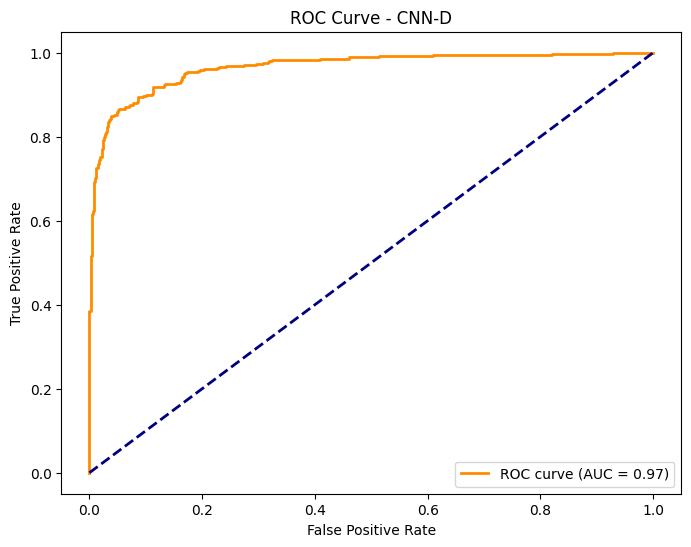

In [ ]:
# Step 4: Evaluate Best Model (Example: CNN-C)
# ==============================
best_model = cnn_models["CNN-D"]

# Predictions on validation set
val_generator.reset()
pred_probs = best_model.predict(val_generator, steps=len(val_generator), verbose=1)
y_true = val_generator.classes

# Convert probabilities to binary predictions using 0.5 threshold
y_pred = (pred_probs >= 0.5).astype(int)

# Classification report
print("Classification Report for CNN-D:")
print(classification_report(y_true, y_pred, target_names=['chihuahua','muffin']))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - CNN-D')
plt.legend(loc='lower right')
plt.show()